<a href="https://colab.research.google.com/github/tcandreetti/challenge2-data-science/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd

#📌 Extracão

Importar os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

In [2]:
url = "https://raw.githubusercontent.com/tcandreetti/challenge2-data-science/main/TelecomX_Data.json"

In [3]:
data = pd.read_json(url)
df = pd.DataFrame(data)
#df = df.set_index('customerID')

In [4]:
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [5]:
#normalizar os dicionarios dentro de df para que cada elemento seja uma coluna

df = pd.json_normalize(df.to_dict(orient='records'))
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

#🔧 Transformação

✅ Explorar as colunas do dataset e verificar seus tipos de dados.

✅ Consultar o dicionário para entender melhor os significados das variáveis.

✅ Identificar as colunas mais relevantes para a análise de evasão.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Erros de tipos de dados

In [7]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['customer.Dependents'] = df['customer.Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['customer.Partner'] = df['customer.Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['phone.PhoneService'] = df['phone.PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.OnlineSecurity'] = df['internet.OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.OnlineBackup'] = df['internet.OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.DeviceProtection'] = df['internet.DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.TechSupport'] = df['internet.TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.StreamingTV'] = df['internet.StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)
df['internet.StreamingMovies'] = df['internet.StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['phone.MultipleLines'] = df['phone.MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)
df['account.Charges.Monthly'] = df['account.Charges.Monthly'].astype(float)

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

df['account.Charges.Total'] = df['account.Charges.Total'].astype(float)

Valores ausentes, duplicados, erros de formatação e inconsistências nas categorias.

In [8]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())
df =df.dropna()

# Verificar linhas duplicadas
print("\nNúmero de linhas duplicadas:", df.duplicated().sum())

#Verificar categorias
print("\n",df['account.Contract'].unique())
print("\n",df['account.PaymentMethod'].unique())
print("\n",df['internet.InternetService'].unique())
print("\n",df['account.Contract'].unique())

Valores ausentes por coluna:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

Número de linhas duplicadas: 0

 ['One year' 'Month-to-month' 'Two year']

 ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

 ['DSL' 'Fiber optic' 'No']

 ['One year' 'Month-to-month' 'Two year']


In [9]:
df_com_churn = df[df['Churn'] == 1]
df_sem_churn = df[df['Churn'] == 0]

#📊 Carga e análise

In [10]:
'''No churn, definir as estatísticas:
a) qual é o gênero que mais dá churn?
b) são seniorCitizen?
c) quantos dependentes costumam ter?
d) qual é o tempo de contrato?
e) possuem assinatura de serviço telefônico?
f) tem mais de uma linha?
g) Qual é o tipo de serviço de internet contratado?
h) adquirem serviços de segurança online?
i) adquirem serviços de backup online?
j) adquirem serviços de proteção de dispositivo?
k) adquirem serviços de suporte técnico online?
l) adquirem serviços de streaming de TV?
m) adquirem serviços de streaming de filmes?
n) qual é o contrato assinado?
o) aderiram a conta sem papel?
p) qual é o método de pagamento?
q) qual é a cobrança mensal?
r) qual é o total de cobrança?'''
display(df_com_churn.head(5))

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,0,1,0,0,1,One year,0,Credit card (automatic),62.7,2791.50
19,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,0,Month-to-month,1,Electronic check,25.1,25.10


In [11]:
df_sem_churn.groupby('customer.gender').size()

,0
customer.gender,
Female,2648
Male,2739


In [12]:
def analise_categorias(df):
  colunas= [
      'customer.SeniorCitizen',
      'customer.Partner',
      'customer.Dependents',
      'phone.PhoneService',
      'phone.MultipleLines',
      'internet.OnlineSecurity',
      'internet.OnlineBackup',
      'internet.DeviceProtection',
      'internet.TechSupport',
      'internet.StreamingTV',
      'internet.StreamingMovies',
      'account.PaperlessBilling'
  ]
  colunas_numericas = [
      'account.Charges.Monthly',
      'account.Charges.Total'
  ]

  colunas_categoricas = [
      'account.Contract',
      'account.PaymentMethod',
      'internet.InternetService'
  ]
  def calculate_percentage(df, column):
    counts = df.groupby(column).size()
    percentages = counts / counts.sum() * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})

  # Calculate percentage for each grouped variable
  df_tipo_contrato = calculate_percentage(df, 'account.Contract')
  df_metodo_pagamento = calculate_percentage(df, 'account.PaymentMethod')
  df_tipo_servico_internet = calculate_percentage(df, 'internet.InternetService')

  #contar a representatividade de cada variável em relação ao total
  tipo_contrato = df.groupby('account.Contract').size()
  metodo_pagamento = df.groupby('account.PaymentMethod').size()
  tipo_servico_internet = df.groupby('internet.InternetService').size()



  # Calcular o total por coluna
  somatorio = df[colunas].sum()
  contagem = df[colunas].count()
  media = df[colunas_numericas].mean()
  mediana = df[colunas_numericas].median()
  moda = df[colunas_numericas].mode().iloc[0]

  #calcular o percentual de cada coluna
  representatividade = somatorio.div(contagem)

  # You can also multiply by 100 to get percentages
  pct = representatividade * 100

  #Dataframe com os dados calculados sobre churn em relação as variáveis inteiras/categóricas
  sumario_churn = pd.DataFrame({
      'Soma': somatorio,
      'Percentage (%)': round(pct, 2)
  })

  sumario_churn_numerico = pd.DataFrame({
      'Média': media,
      'Mediana': mediana,
      'Moda': moda
  })



  print(sumario_churn)
  print("\n",sumario_churn_numerico)

  print("\n",df_tipo_contrato)
  print("\n",df_metodo_pagamento)
  print("\n",df_tipo_servico_internet)
  #return sumario_churn

analise_categorias(df_com_churn)


                           Soma  Percentage (%)
customer.SeniorCitizen      476           25.47
customer.Partner            669           35.79
customer.Dependents         326           17.44
phone.PhoneService         1699           90.90
phone.MultipleLines         850           45.48
internet.OnlineSecurity     295           15.78
internet.OnlineBackup       523           27.98
internet.DeviceProtection   545           29.16
internet.TechSupport        310           16.59
internet.StreamingTV        814           43.55
internet.StreamingMovies    818           43.77
account.PaperlessBilling   1400           74.91

                                Média  Mediana  Moda
account.Charges.Monthly    74.441332    79.65  74.4
account.Charges.Total    1531.796094   703.55  20.2

                   Count  Percentage
account.Contract                   
Month-to-month     1655       88.55
One year            166        8.88
Two year             48        2.57

                            Count  

Churn:
- poucos idosos
- sem dependentes
- já possuem um serviço de telefone
- podem ou não ter múltiplas linhas
- Geralmente tem serviço de streaming
- aderem a conta digital
- pagam em média 74 dólares
- total gasto pelo cliente 1531 dólares
- contrato mensal
- cheque eletrônico
- fibra óptica

Sem Churn:
- poucos idosos
- com parceiro/parceira
- já possuem um serviço de telefone
- podem ou não ter múltiplas linhas
- Geralmente NÃO tem serviço de streaming
- aderem a conta digital com menor frequência
- pagam em média 61 dólares
- total gasto pelo cliente 2540 dólares
- contratos variados
- pagamentos variados
- diversos tipos de internet

Público Churn> pessoas sem parceiro - com conta mensal sem fidelização, aderentes a outros serviços de streaming


In [13]:
analise_categorias(df_sem_churn)

                           Soma  Percentage (%)
customer.SeniorCitizen      706           13.11
customer.Partner           2840           52.72
customer.Dependents        1844           34.23
phone.PhoneService         4852           90.07
phone.MultipleLines        2211           41.04
internet.OnlineSecurity    1779           33.02
internet.OnlineBackup      1977           36.70
internet.DeviceProtection  1942           36.05
internet.TechSupport       1790           33.23
internet.StreamingTV       1972           36.61
internet.StreamingMovies   1997           37.07
account.PaperlessBilling   2908           53.98

                                Média  Mediana   Moda
account.Charges.Monthly    61.394932    64.55  20.05
account.Charges.Total    2540.440867  1669.40  19.55

                   Count  Percentage
account.Contract                   
Month-to-month     2350       43.62
One year           1352       25.10
Two year           1685       31.28

                            Coun

#📄Relatorio Final

As conclusões sobre o público com e sem churn, baseadas na análise do código fornecido, podem ser resumidas da seguinte forma:

**Público com Churn:**

*   **Demografia:** Tendem a ser menos idosos e sem dependentes. A maioria possui serviço de telefone, com ou sem múltiplas linhas.
*   **Serviços:** Apresentam maior adesão a serviços de streaming (TV e filmes) e optam por conta sem papel (digital). Frequentemente utilizam fibra óptica como serviço de internet. Têm menor probabilidade de adquirir serviços de segurança online, backup online, proteção de dispositivo e suporte técnico online.
*   **Contrato e Pagamento:** Predominantemente possuem contratos mensais e utilizam cheque eletrônico como método de pagamento.
*   **Custos:** Têm uma cobrança mensal média mais alta (aproximadamente 74 dólares) em comparação com o público sem churn, mas um total gasto pelo cliente menor (aproximadamente 1531 dólares).
*   **Conclusão Geral:** O público com churn parece ser composto por clientes mais novos, que buscam flexibilidade (contrato mensal), conveniência (conta sem papel, cheque eletrônico)
e serviços de entretenimento (streaming), mas que não investem tanto em serviços de segurança e suporte, o que pode indicar menor fidelidade ou uma percepção de que esses serviços
não são essenciais para eles. A alta cobrança mensal com um total gasto menor sugere que eles não ficam por muito tempo.

**Público sem Churn:**

*   **Demografia:** Também tendem a ser menos idosos, mas com maior probabilidade de ter parceiros. A maioria possui serviço de telefone, com ou sem múltiplas linhas.
*   **Serviços:** Geralmente NÃO têm serviço de streaming. Adere à conta digital com menor frequência. Utilizam diversos tipos de serviço de internet. Têm maior probabilidade de adquirir serviços de segurança online, backup online, proteção de dispositivo e suporte técnico online.
*   **Contrato e Pagamento:** Possuem contratos mais variados (não apenas mensais) e utilizam diversos métodos de pagamento.
*   **Custos:** Têm uma cobrança mensal média menor (aproximadamente 61 dólares), mas um total gasto pelo cliente significativamente maior (aproximadamente 2540 dólares).
*   **Conclusão Geral:** O público sem churn parece ser mais estabelecido (com parceiro), menos focado em entretenimento via streaming, mais propenso a proteger seus serviços (segurança, backup, etc.), e mais flexível em relação a tipos de contrato e pagamento. O total gasto consideravelmente maior indica uma permanência maior na empresa, reforçando a ideia de fidelidade.

**Conclusões Comparativas Principais:**

*   **Contrato:** O tipo de contrato é um forte indicador. Clientes com contratos mensais têm maior probabilidade de churn do que aqueles com contratos de longo prazo.
*   **Método de Pagamento:** O cheque eletrônico está mais associado ao churn.
*   **Serviços Adicionais (Segurança, Backup, etc.):** Clientes que aderem a esses serviços adicionais são menos propensos ao churn.
*   **Serviços de Streaming:** Clientes que utilizam serviços de streaming (TV e Filmes) são mais propensos ao churn.
*   **Custo:** Clientes com churn têm uma cobrança mensal média maior, mas passam menos tempo com a empresa, resultando em um total gasto menor. Clientes sem churn pagam menos mensalmente, mas a longo prazo gastam significativamente mais.
*   **Estado Civil (Partner):** Ter um parceiro parece ser um fator que reduz a probabilidade de churn.
*   **Conta sem Papel:** A adesão à conta sem papel é mais comum entre clientes com churn.

Em suma, o público com churn tende a ser composto por clientes que buscam flexibilidade e entretenimento digital, mas que não se comprometem com contratos de longo prazo ou serviços adicionais de segurança, resultando em uma permanência mais curta e um menor valor total gasto na empresa. O público sem churn é mais variado em termos de serviços e pagamento, demonstra maior compromisso com serviços adicionais e contratos, resultando em uma permanência mais longa e um valor total gasto maior.

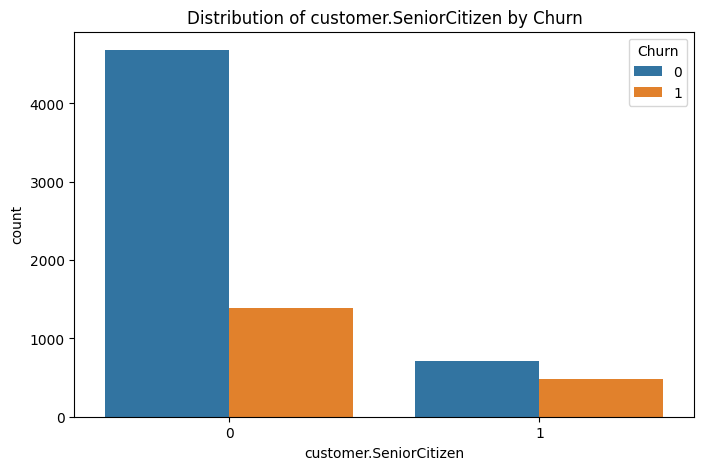

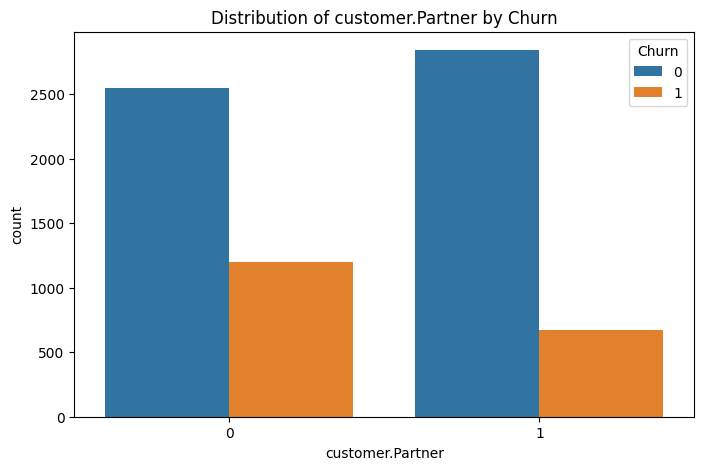

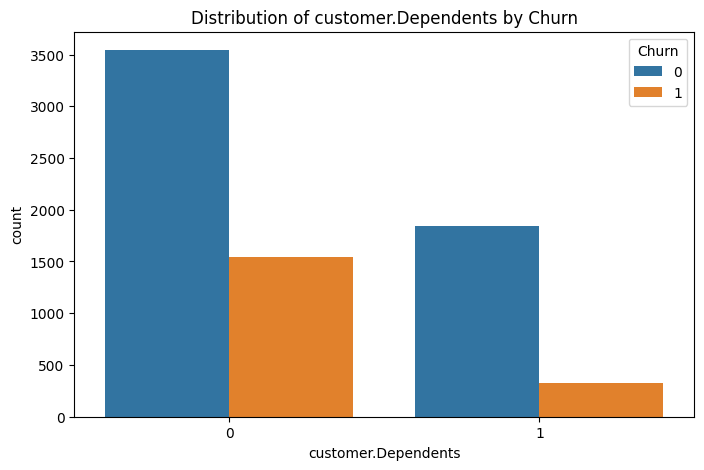

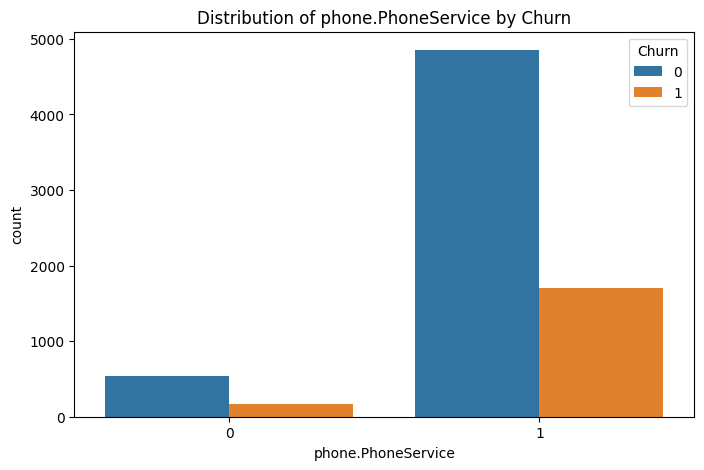

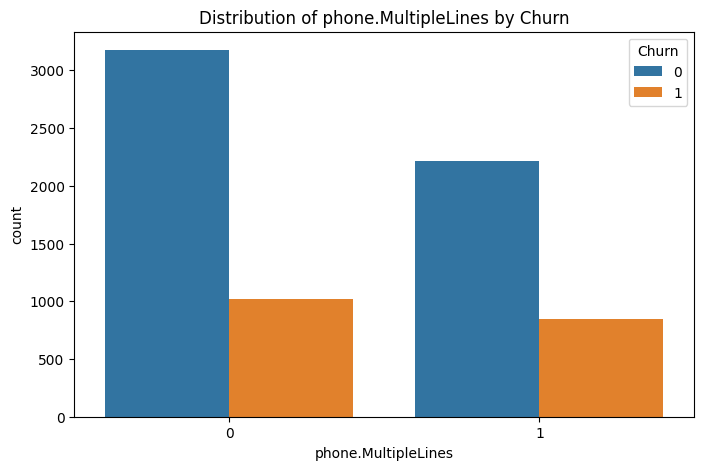

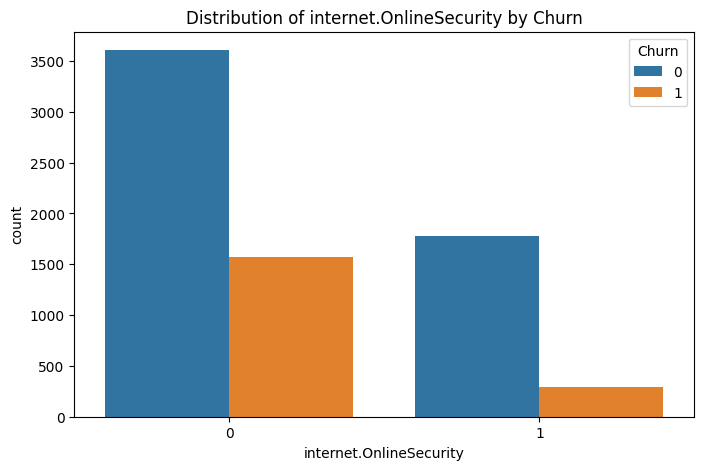

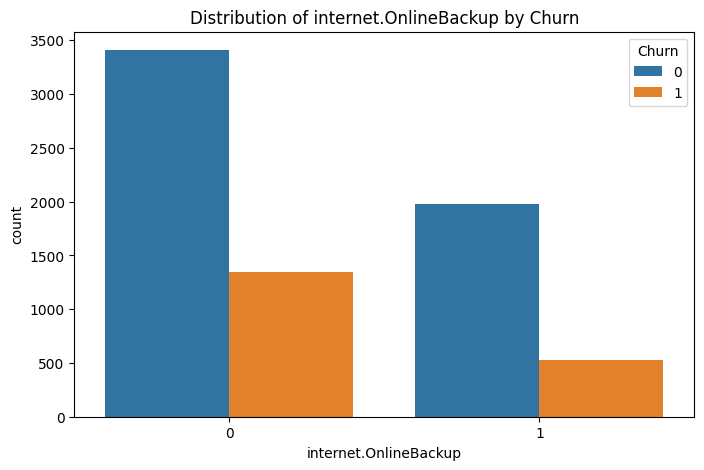

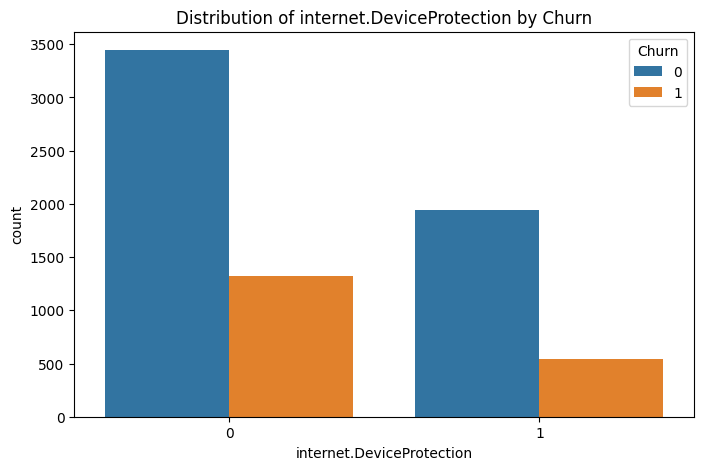

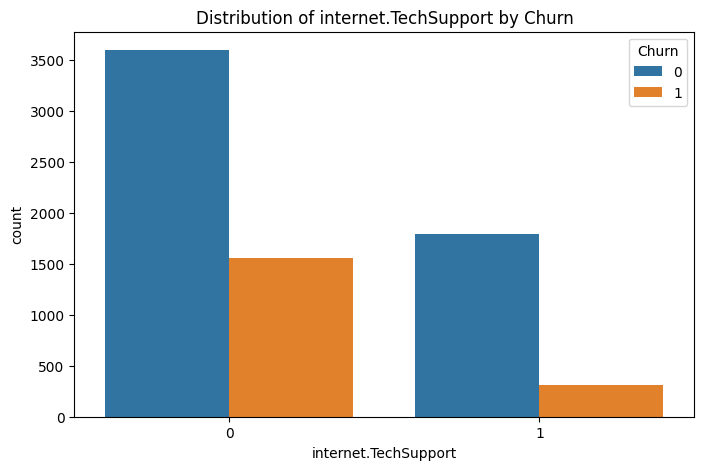

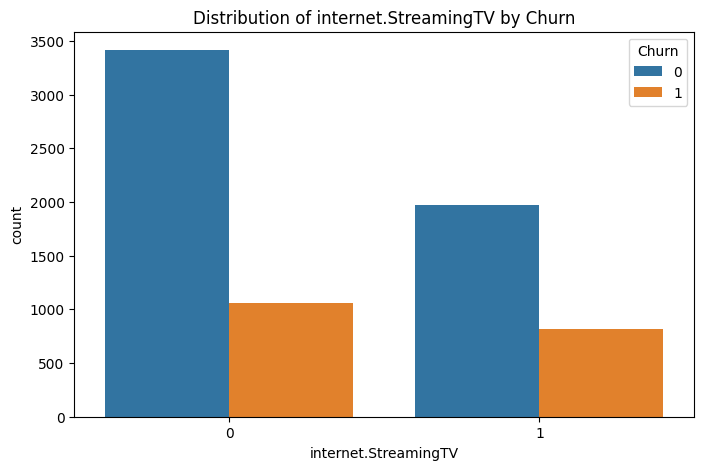

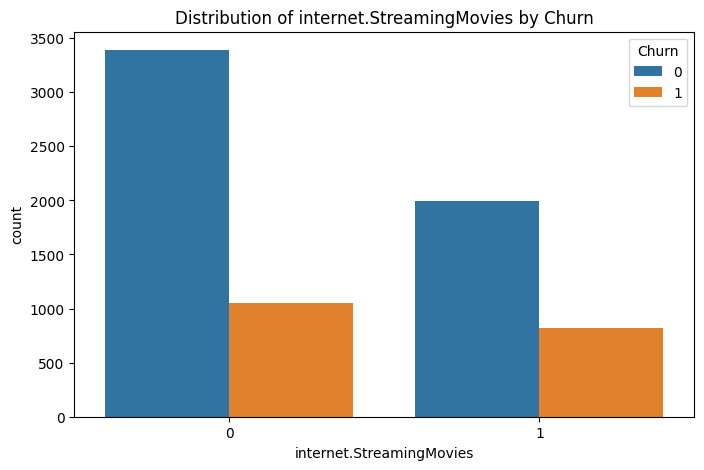

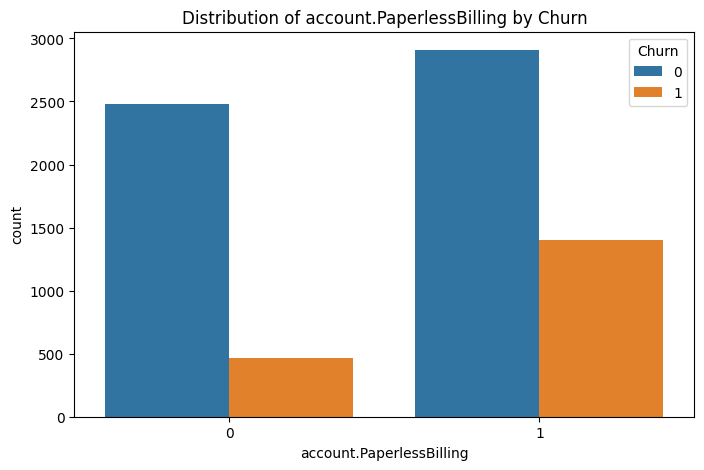

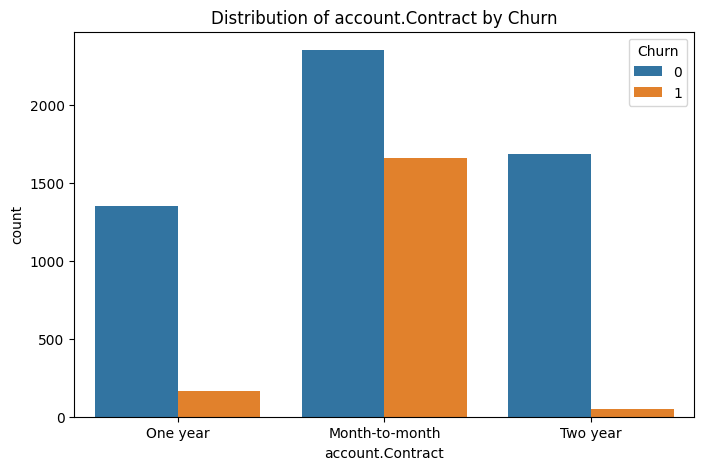

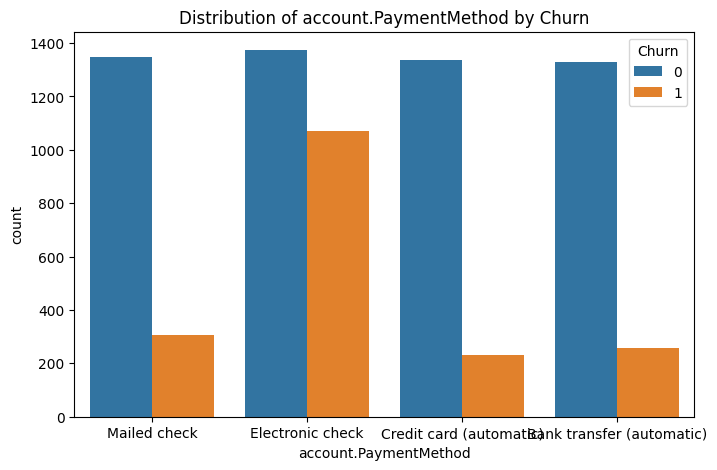

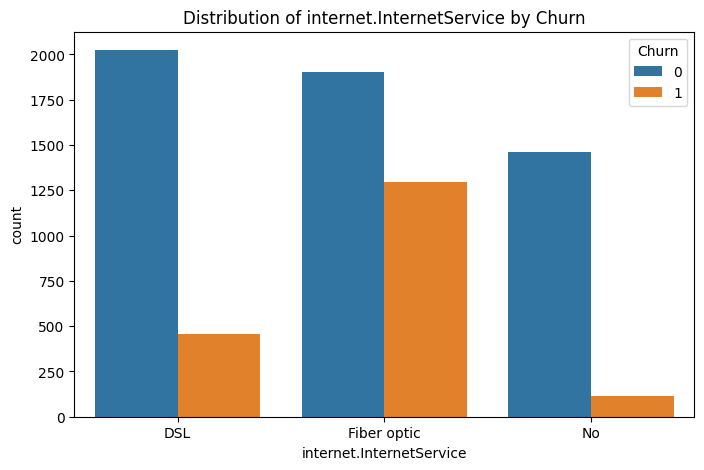

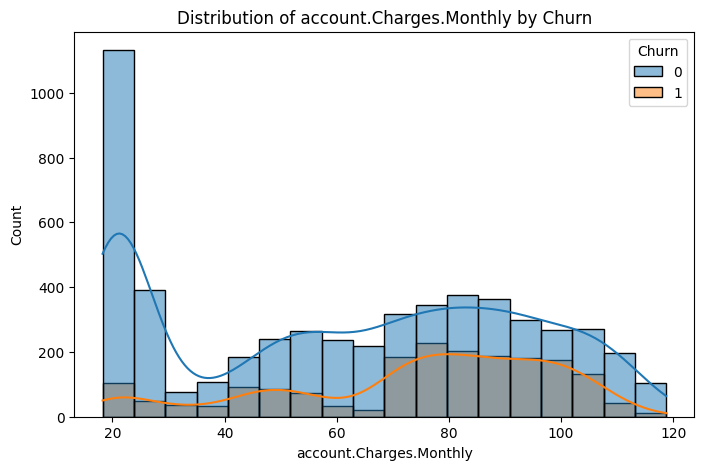

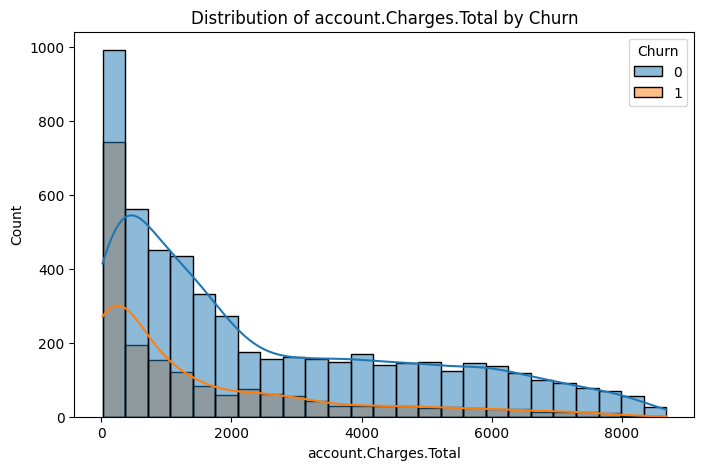

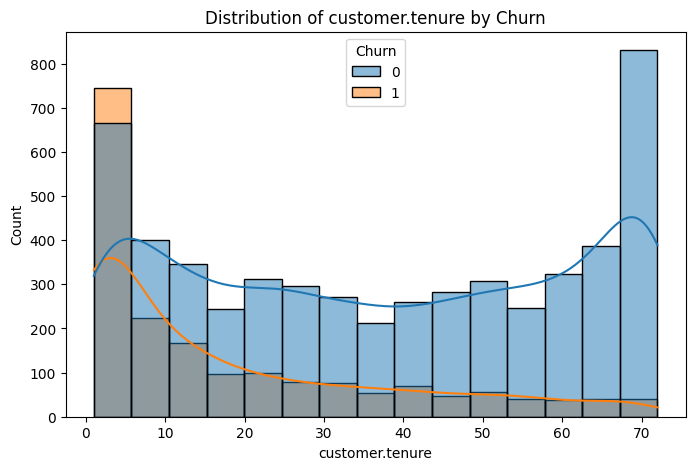

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
cols_to_plot = [
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

# Plot the distribution of categorical features for churned vs. non-churned customers
for col in cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

# Plot the distribution of numerical features for churned vs. non-churned customers
numerical_cols = [
    'account.Charges.Monthly',
    'account.Charges.Total',
    'customer.tenure'
] # Assuming customer.tenure exists based on previous analysis

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, common_norm=False)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()
